## 1. Import packages

In [328]:
import tensorflow as tf
from tensorflow_examples.models.pix2pix import pix2pix
from IPython.display import clear_output
import matplotlib.pyplot as plt
import cv2
import numpy as np
import glob, os
import zipfile
from tensorflow import keras
from tensorflow.keras import callbacks
from tensorflow.keras.utils import plot_model

## 2. Data loading

In [329]:
filepath_test = r"C:\Users\syami\Downloads\data-science-bowl-2018\data-science-bowl-2018-2\test"

In [330]:
filepath_train = r"C:\Users\syami\Downloads\data-science-bowl-2018\data-science-bowl-2018-2\train"

In [331]:
# Initialize empty lists to store images and masks
images_test = []
masks_test = []

In [332]:
# Initialize empty lists to store images and masks
images_train = []
masks_train = []

In [333]:
#Load images for test
image_path_test = os.path.join(filepath_test,'inputs')
for img in os.listdir(image_path_test):
    #Get the full path of the image file
    full_path = os.path.join(image_path_test,img)
    #Read the image file based on the full path
    img_np = cv2.imread(full_path)
    #Convert the image from bgr to rgb
    img_np = cv2.cvtColor(img_np,cv2.COLOR_BGR2RGB)
    #Resize the image into 128x128
    img_np = cv2.resize(img_np,(128,128))
    #Place the image into the empty list
    images_test.append(img_np)

In [334]:
print(image_path_test)

C:\Users\syami\Downloads\data-science-bowl-2018\data-science-bowl-2018-2\test\inputs


In [335]:
os.listdir(image_path_test)

['00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552.png',
 '0532c64c2fd0c4d3188cc751cdfd566b1cfba3d269358717295bab1504c7c275.png',
 '06350c7cc618be442c15706db7a68e91f313758d224de4608f9b960106d4f9ca.png',
 '0d2bf916cc8de90d02f4cd4c23ea79b227dbc45d845b4124ffea380c92d34c8c.png',
 '0e5edb072788c7b1da8829b02a49ba25668b09f7201cf2b70b111fc3b853d14f.png',
 '0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1.png',
 '10328b822b836e67b547b4144e0b7eb43747c114ce4cacd8b540648892945b00.png',
 '139946af9e2c7ef4f0298e622b831dbef5e5c0cd088eb5bc3382f8df9355443d.png',
 '13f2bec0a24c70345372febb14c4352877b1b6c1b01896246048e83c345c0914.png',
 '14cc1424c59808274e123db51292e9dbb5b037ef3e7c767a8c45c9ac733b91bf.png',
 '15039b3acccc4257a1a442646a89b6e596b5eb4531637e6d8fa1c43203722c99.png',
 '150b0ffa318c87b31d78af0e87d60390dbcd84b5f228a8c1fb3225cbe5df3e3f.png',
 '1b6044e4858a9b7cee9b0028d8e54fbc8fb72e6c4424ab5b9f3859bfc72b33c5.png',
 '1bd0f2b3000b7c7723f25335fabfcdddcdf4595dd7de1b142

In [336]:
#Load images for train
image_path_train = os.path.join(filepath_train,'inputs')
for img in os.listdir(image_path_train):
    #Get the full path of the image file
    full_path = os.path.join(image_path_train,img)
    #Read the image file based on the full path
    img_np = cv2.imread(full_path)
    #Convert the image from bgr to rgb
    img_np = cv2.cvtColor(img_np,cv2.COLOR_BGR2RGB)
    #Resize the image into 128x128
    img_np = cv2.resize(img_np,(128,128))
    #Place the image into the empty list
    images_train.append(img_np)

In [337]:
print(image_path_train)

C:\Users\syami\Downloads\data-science-bowl-2018\data-science-bowl-2018-2\train\inputs


In [338]:
os.listdir(image_path_train)

['003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1.png',
 '00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e.png',
 '0121d6759c5adb290c8e828fc882f37dfaf3663ec885c663859948c154a443ed.png',
 '01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf.png',
 '0280fa8f60f6bcae0f97d93c28f60be194f9309ff610dc5845e60455b0f87c21.png',
 '0287e7ee5b007c91ae2bd7628d09735e70496bc6127ecb7f3dd043e04ce37426.png',
 '02903040e19ddf92f452907644ad3822918f54af41dd85e5a3fe3e1b6d6f9339.png',
 '03398329ced0c23b9ac3fac84dd53a87d9ffe4d9d10f1b5fe8df8fac12380776.png',
 '03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe.png',
 '03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a.png',
 '0402a81e75262469925ea893b6706183832e85324f7b1e08e634129f5d522cdd.png',
 '04acab7636c4cf61d288a5962f15fa456b7bde31a021e5deedfbf51288e4001e.png',
 '05040e2e959c3f5632558fc9683fec88f0010026c555b499066346f67fdd0e13.png',
 '05a8f65ebd0b30d3b210f30b4d640c847c2e710d0d135e0ae

In [339]:
#Load masks for test
mask_path_test = os.path.join(filepath_test,'masks')
for mask in os.listdir(mask_path_test):
    #Get the full path of the mask file
    full_path = os.path.join(mask_path_test,mask)
    #Read the mask file as a grayscale image
    mask_np = cv2.imread(full_path,cv2.IMREAD_GRAYSCALE)
    #Resize the image into 128x128
    mask_np = cv2.resize(mask_np,(128,128))
    #Place the mask into the empty list
    masks_test.append(mask_np)

In [340]:
# Print the number of loaded images and masks
print(f"Loaded {len(images_test)} images.")
print(f"Loaded {len(masks_test)} masks.")

Loaded 67 images.
Loaded 67 masks.


In [341]:
#Load masks for train
mask_path_train = os.path.join(filepath_train,'masks')
for mask in os.listdir(mask_path_train):
    #Get the full path of the mask file
    full_path = os.path.join(mask_path_train,mask)
    #Read the mask file as a grayscale image
    mask_np = cv2.imread(full_path,cv2.IMREAD_GRAYSCALE)
    #Resize the image into 128x128
    mask_np = cv2.resize(mask_np,(128,128))
    #Place the mask into the empty list
    masks_train.append(mask_np)

In [342]:
# Print the number of loaded images and masks
print(f"Loaded {len(images_train)} images.")
print(f"Loaded {len(masks_train)} masks.")

Loaded 603 images.
Loaded 603 masks.


## 3. Convert the list of np array into a full np array

In [343]:
#Convert the list of np array into a full np array
images_np_test = np.array(images_test)
masks_np_test = np.array(masks_test)

In [344]:
#Convert the list of np array into a full np array
images_np_train = np.array(images_train)
masks_np_train = np.array(masks_train)

## 4. Data preprocessing

In [345]:
#4.1. Expand the mask dimension to include the channel axis
masks_np_exp_test = np.expand_dims(masks_np_test,axis=-1)

In [346]:
#Expand the mask dimension to include the channel axis
masks_np_exp_train = np.expand_dims(masks_np_train,axis=-1)

In [347]:
#4.2. Convert the mask value into just 0 and 1
converted_masks_np_test = np.round(masks_np_exp_test/255)

In [348]:
#Convert the mask value into just 0 and 1
converted_masks_np_train = np.round(masks_np_exp_train/255)

In [349]:
#4.3. Normalize the images pixel value
normalized_images_np_test = images_np_test/255.0

In [350]:
#Normalize the images pixel value
normalized_images_np_train = images_np_train/255.0

## 5. Convert the numpy array into tensorflow tensors

In [351]:
# Convert the numpy arrays into TensorFlow tensors for test dataset
images_test_tensor = tf.data.Dataset.from_tensor_slices(normalized_images_np_test)
masks_test_tensor = tf.data.Dataset.from_tensor_slices(converted_masks_np_test)


In [352]:
# Convert the numpy arrays into TensorFlow tensors for train dataset
images_train_tensor = tf.data.Dataset.from_tensor_slices(normalized_images_np_train)
masks_train_tensor = tf.data.Dataset.from_tensor_slices(converted_masks_np_train)


## 6. Combine features and labels together to form a zip dataset

In [353]:
# Combine features and labels for test dataset
test = tf.data.Dataset.zip((images_test_tensor, masks_test_tensor))

In [354]:
# Combine features and labels for train dataset
train = tf.data.Dataset.zip((images_train_tensor, masks_train_tensor))

In [355]:
#Convert this into prefetch dataset
BATCH_SIZE = 64
sample_image = images_test[0]
sample_mask = masks_test[0]
# Shuffle, batch, and prefetch the training dataset
train_dataset = train.shuffle(buffer_size=len(images_np_test)).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
# Batch the testing dataset
test_dataset = test.batch(BATCH_SIZE)

In [356]:
# Print an example from the training dataset
for image, mask in test_dataset.take(1):
    print("Image shape:", image.shape)
    print("Mask shape:", mask.shape)

Image shape: (64, 128, 128, 3)
Mask shape: (64, 128, 128, 1)


## 7. Model development

In [357]:
"""
The plan is to apply transfer learning by using a pretrained model as the feature extractor.
Then, we will proceed to build our own upsampling path with the tensorflow_example module we just imported + other default keras layers.
"""
#8.1. Use a pretrained model as feature extractor
base_model = keras.applications.MobileNetV2(input_shape=[128,128,3],include_top=False)
base_model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_15[0][0]']               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][

In [358]:
#plot_model(base_model,show_shapes=True,show_layer_names=True)

In [359]:
#8.2. Specify the layers that we need as outputs for the feature extractor
layer_names = [
    "block_1_expand_relu",      #64x64
    "block_3_expand_relu",      #32x32
    "block_6_expand_relu",      #16x16
    "block_13_expand_relu",     #8x8
    "block_16_project"          #4x4
]

base_model_outputs = [base_model.get_layer(name).output for name in layer_names]

In [360]:
#8.3. Instantiate the feature extractor
down_stack = keras.Model(inputs=base_model.input,outputs=base_model_outputs)
down_stack.trainable = False

In [361]:
#8.4. Define the upsampling path
up_stack = [
    pix2pix.upsample(512,3),        #4x4  --> 8x8
    pix2pix.upsample(256,3),        #8x8  --> 16x16
    pix2pix.upsample(128,3),        #16x16 --> 32x32
    pix2pix.upsample(64,3)          #32x32 --> 64x64
]

In [362]:
#8.5. Define a function for the unet creation.
def unet(output_channels:int):
    """
    We are going to use functional API to connect the downstack and upstack properly
    """
    #(A) Input layer
    inputs = keras.Input(shape=[128,128,3])
    #(B) Down stack (Feature extractor)
    skips = down_stack(inputs)
    x = skips[-1]       #This is the output that will progress until the end of the model
    skips = reversed(skips[:-1])

    #(C) Build the upsampling path
    """
    1. Let the final output from the down stack flow through the up stack
    2. Concatenate the output properly by following the structure of the U-Net
    """
    for up,skip in zip(up_stack,skips):
        x = up(x)
        concat = keras.layers.Concatenate()
        x = concat([x,skip])

    #(D) Use a transpose convolution layer to perform one last upsampling. This convolution layer will become the output layer as well.
    last = keras.layers.Conv2DTranspose(output_channels,kernel_size=3,strides=2,padding='same')     #64x64 --> 128x128
    outputs = last(x)
    model = keras.Model(inputs=inputs,outputs=outputs)
    return model

In [363]:
#8.6. Create the U-Net model by using the function
OUTPUT_CLASSES = 3
model = unet(OUTPUT_CLASSES)
model.summary()
keras.utils.plot_model(model)

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_14 (Functional)          [(None, 64, 64, 96)  1841984     ['input_16[0][0]']               
                                , (None, 32, 32, 14                                               
                                4),                                                               
                                 (None, 16, 16, 192                                               
                                ),                                                         

## 8. Compile the model

In [364]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',loss=loss,metrics=['accuracy'])

## 9. Create functions to show predictions

In [365]:
def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask,axis=-1)
    pred_mask = pred_mask[...,tf.newaxis]       #equivalent to tf.expand_dims()
    return pred_mask[0]

def show_predictions(dataset=None,num=1):
    if dataset:
        for image,mask in dataset.take(num):
            pred_mask = model.predict(image)
            display([image[0],mask[0],create_mask(pred_mask)])
    else:
        display([sample_image,sample_mask,create_mask(model.predict(sample_image[tf.newaxis,...]))])

#show_predictions()

In [366]:
def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask,axis=-1)
    pred_mask = pred_mask[...,tf.newaxis]       #equivalent to tf.expand_dims()
    return pred_mask[0]

def show_predictions(dataset=None,num=1):
    for image,mask in dataset.take(num):
        pred_mask = model.predict(image)
        display([image[0],mask[0],create_mask(pred_mask)])
   
#show_predictions()

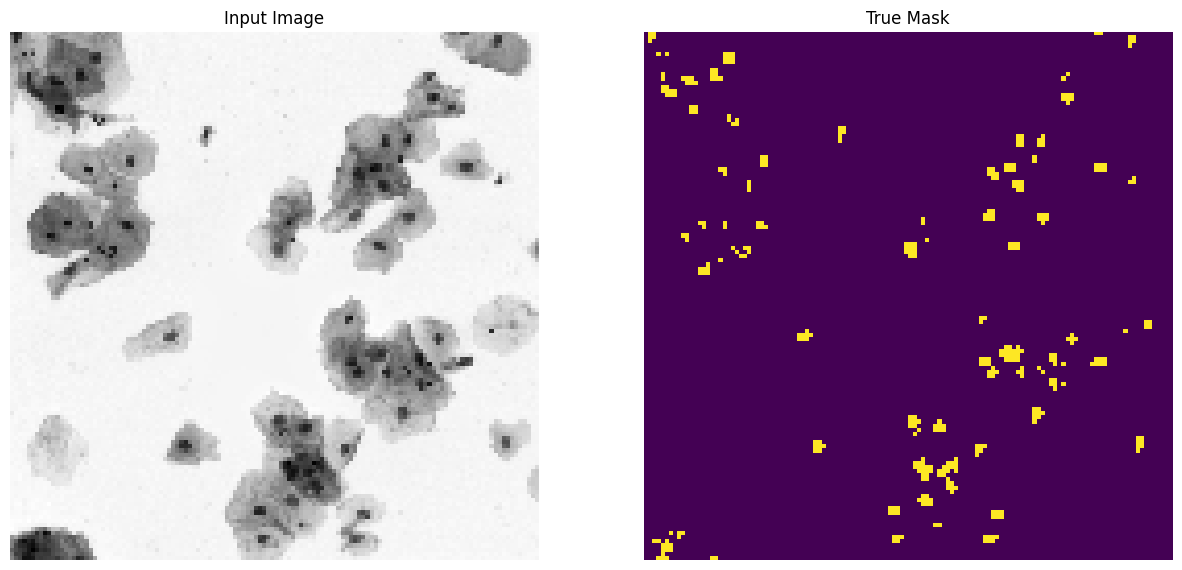

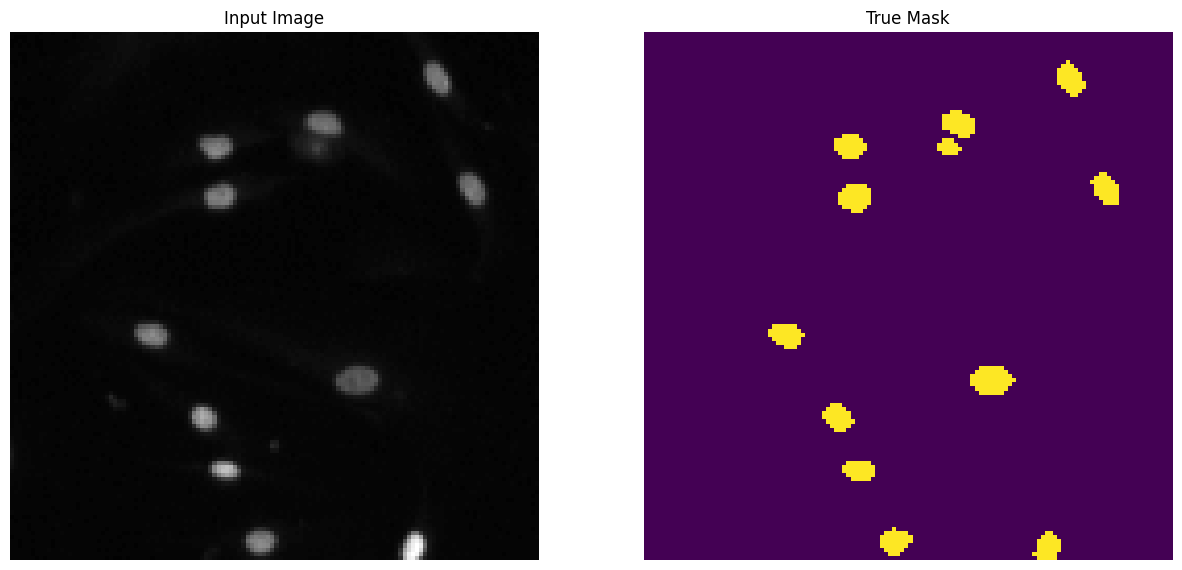

In [367]:
def display(display_list):
    plt.figure(figsize=(15,15))
    title = ["Input Image","True Mask","Predicted Mask"]
    for i in range(len(display_list)):
        plt.subplot(1,len(display_list),i+1)
        plt.title(title[i])
        plt.imshow(keras.utils.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

for images,masks in train_dataset.take(2):
    sample_image,sample_mask = images[0],masks[0]
    display([sample_image,sample_mask])

## 11. Create functions to show predictions

1/1 [==============================] - 1s 1s/step


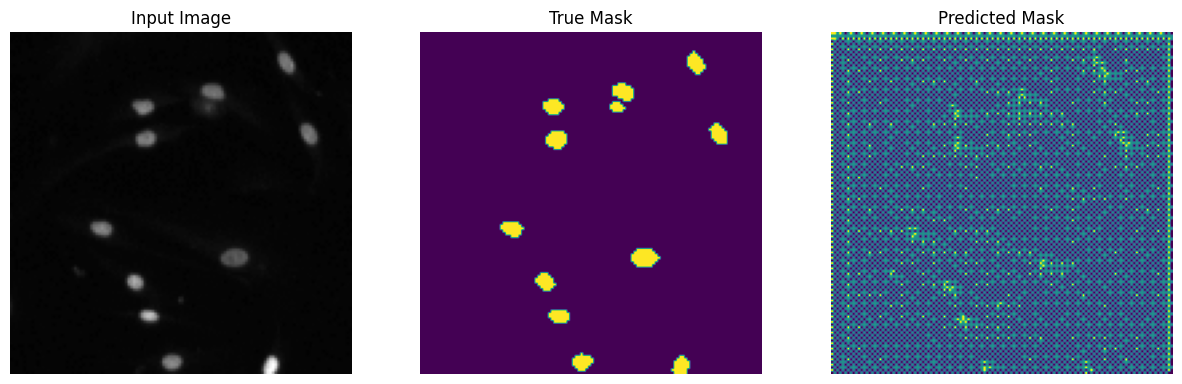

In [368]:
def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask,axis=-1)
    pred_mask = pred_mask[...,tf.newaxis]       #equivalent to tf.expand_dims()
    return pred_mask[0]

def show_predictions(dataset=None,num=1):
    if dataset:
        for image,mask in dataset.take(num):
            pred_mask = model.predict(image)
            display([image[0],mask[0],create_mask(pred_mask)])
    else:
        display([sample_image,sample_mask,create_mask(model.predict(sample_image[tf.newaxis,...]))])

show_predictions()

## 12. Create a custom callback function to display results during model training

In [369]:
class DisplayCallback(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs=None):
        clear_output(wait=True) # will be come out 1 epoch.. 
        show_predictions()
        print('\nSample prediction after epoch #{}\n'.format(epoch+1))

In [370]:
#Create a TensorBoard callback object for the usage of TensorBoard
import tensorflow as tf
import datetime
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import TensorBoard
base_log_path = r"tensorboard_logs\capstone4"
log_path = os.path.join(base_log_path,datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tb = callbacks.TensorBoard(log_path)

## 13. Model training

1/1 [==============================] - 0s 66ms/step


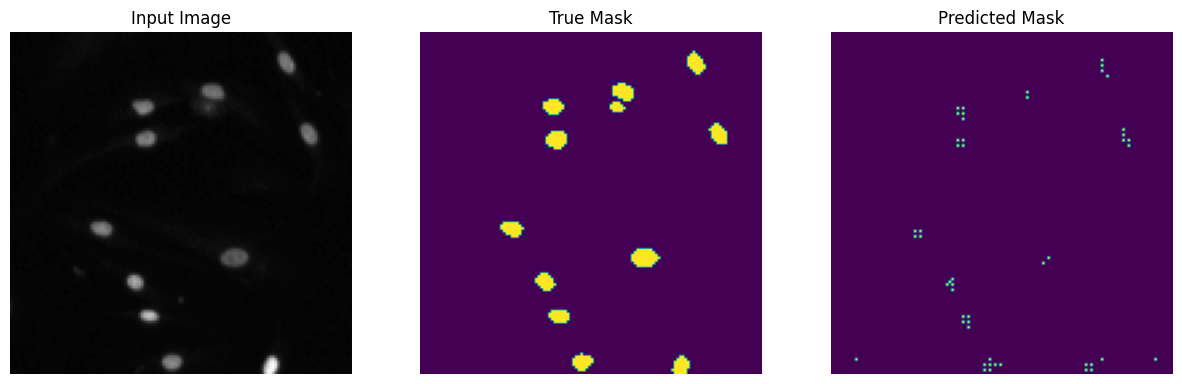


Sample prediction after epoch #11

1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.4853 - val_accuracy: 0.8475


In [371]:
#Implement the EarlyStopping to prevent overfitting
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=3)
EPOCHS = 20
VAL_SUBSPLITS = 5
VALIDATION_STEPS = len(images) //BATCH_SIZE//VAL_SUBSPLITS
STEPS_PER_EPOCH = len(mask) // BATCH_SIZE
history = model.fit(train_dataset,
                    validation_data=test_dataset,                
                    epochs=EPOCHS,
                    steps_per_epoch=STEPS_PER_EPOCH,
                    callbacks=[DisplayCallback(), tb, keras.callbacks.TensorBoard(log_dir=log_path),
                               keras.callbacks.EarlyStopping(patience=3)],)

## 14. Model deployment

2/2 [==============================] - 1s 686ms/step


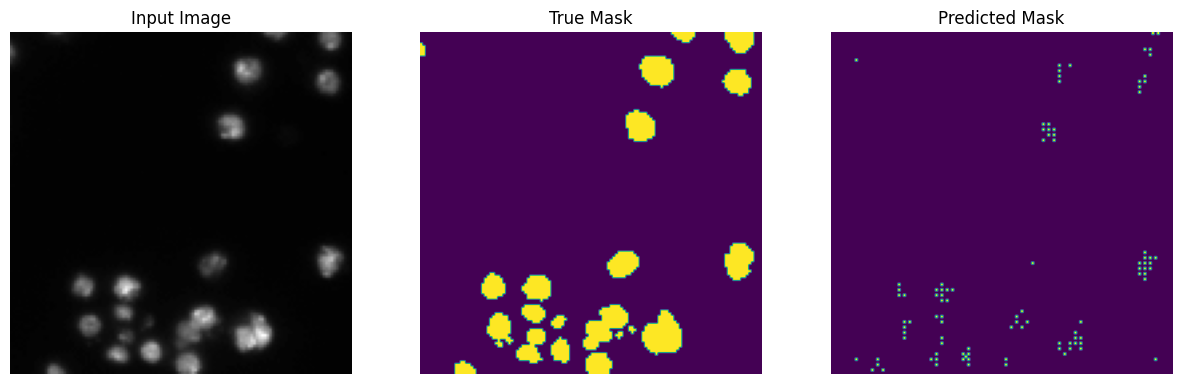

1/1 [==============================] - 0s 126ms/step


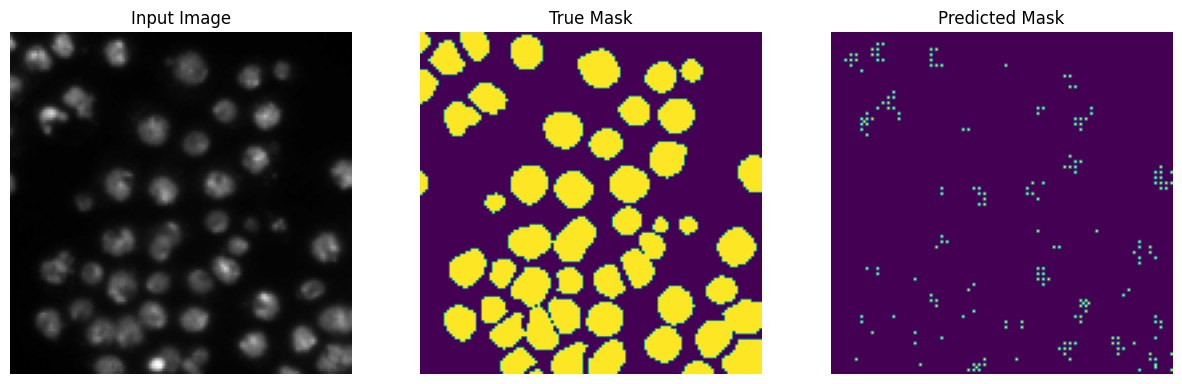

In [372]:
#Model deployment for test dataset
show_predictions(test_dataset,3)

2/2 [==============================] - 1s 638ms/step


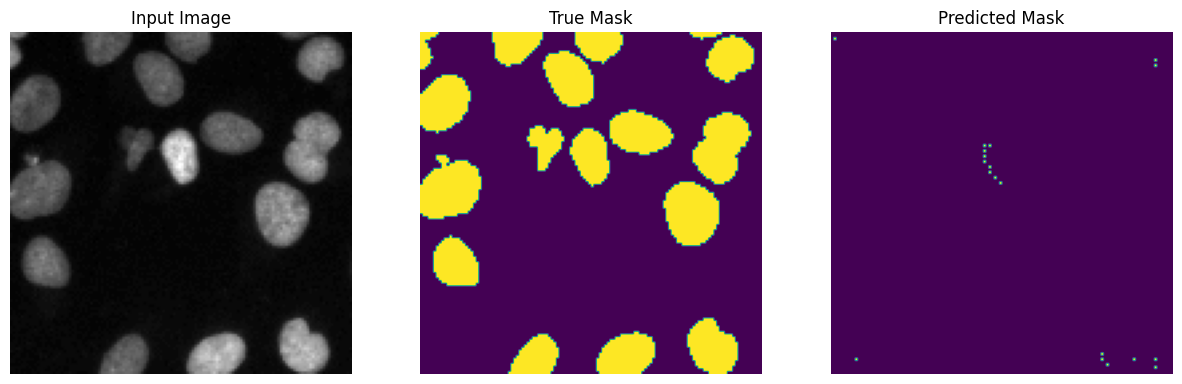

2/2 [==============================] - 1s 770ms/step


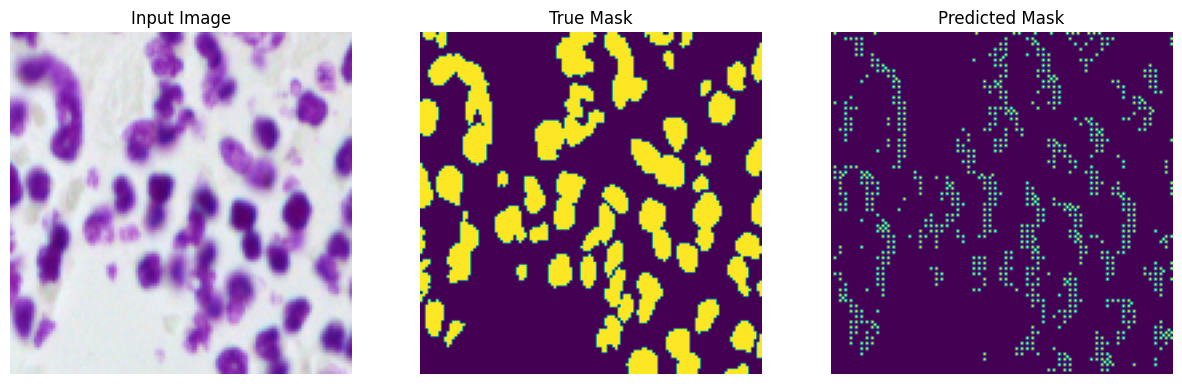

2/2 [==============================] - 1s 691ms/step


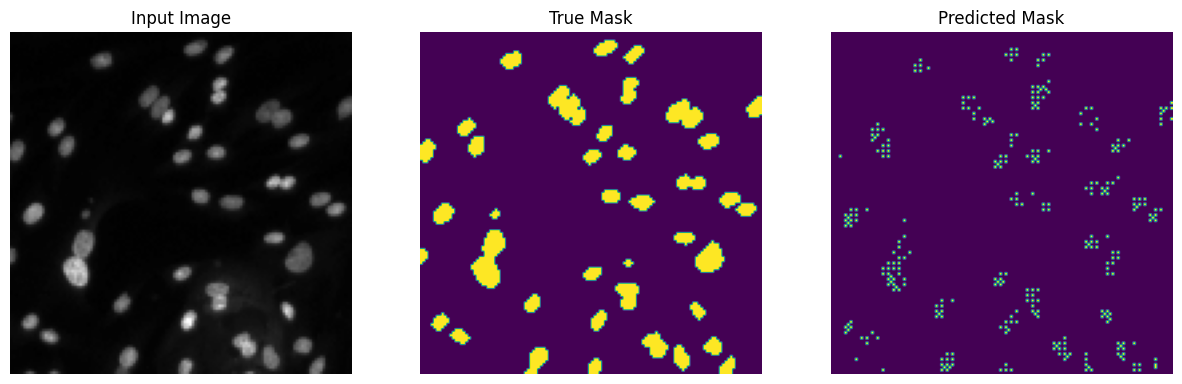

In [373]:
#model deployment for train dataset
show_predictions(train_dataset,3)

## 15. Save the model

In [374]:
save_path = os.path.join("save_model", "assessment_4_model.h5")
model.save(save_path)